In [1]:
# HPC
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_age  = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid.nc')
ds_age_corrected  = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc')
ds_age_40km  = xr.open_dataset(dataPath + 'age_data_40kms.nc')
ds_ser_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_ser.nc')
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp0006.nc')

In [5]:
ds_age_40km['age_c'].data[:, 35, 20], ds_age_40km['age_c_uncert'].data[:, 35, 20]

(array([ -999.        ,  -999.        ,  -999.        ,  -999.        ,
         -999.        ,  -999.        ,  -999.        ,  -999.        ,
         -999.        ,  -999.        ,  -999.        ,  -999.        ,
         -999.        ,  -999.        ,  -999.        ,  -999.        ,
         -999.        ,  -999.        ,  -999.        ,  -999.        ,
         -999.        ,  -999.        ,  -999.        , 43282.8168516 ,
        41415.30372513, 39500.51427878, 37537.25170682, 35524.28890622,
        33460.36770972, 31025.74010889, 28464.17686098, 25837.76733071,
        23144.86992663, 20470.9220478 , 18876.60920046, 17241.93613124,
        15565.88111626, 13847.39656656, 13234.9508807 , 12866.10531516,
        12487.92237967, 12100.1656976 , 11505.71599737, 10890.81175482,
        10260.34113726,  9714.17059524,  9270.24855698,  8815.08857881,
         8372.68085607,  7995.90914377,  7609.59941016,  7225.40522629,
         6865.98225861,  6497.46045519,  6153.43586081,  5837.45

In [6]:
age_isochrones = ds_age['age_iso'].data
age_isochrones

array([ 11700.,  29000.,  57000., 115000.])

In [8]:
ds_age_40km

<xarray.Dataset> Size: 10MB
Dimensions:                          (y: 73, x: 43, sigma: 81)
Coordinates:
  * y                                (y) float64 584B -3.45e+03 ... -570.0
  * x                                (x) float64 344B -720.0 -680.0 ... 960.0
  * sigma                            (sigma) float64 648B 0.0 0.003962 ... 1.0
Data variables:
    age_c                            (sigma, y, x) float64 2MB -999.0 ... 0.0
    age_c_uncert_unbounded           (sigma, y, x) float64 2MB ...
    age_c_uncert_unbounded_rigorous  (sigma, y, x) float64 2MB ...
    H                                (y, x) float64 25kB 0.0 0.0 0.0 ... 0.0 0.0
    age_c_uncert                     (sigma, y, x) float64 2MB -2e+09 ... -2e+09
    age_c_uncert_rigorous            (sigma, y, x) float64 2MB ...
Attributes:
    title:        Downsampled age, uncertainty, and thickness
    description:  Processed from corrected age data on to SICOPOLIS 40 km grid
    units:        age in years, thickness in meters

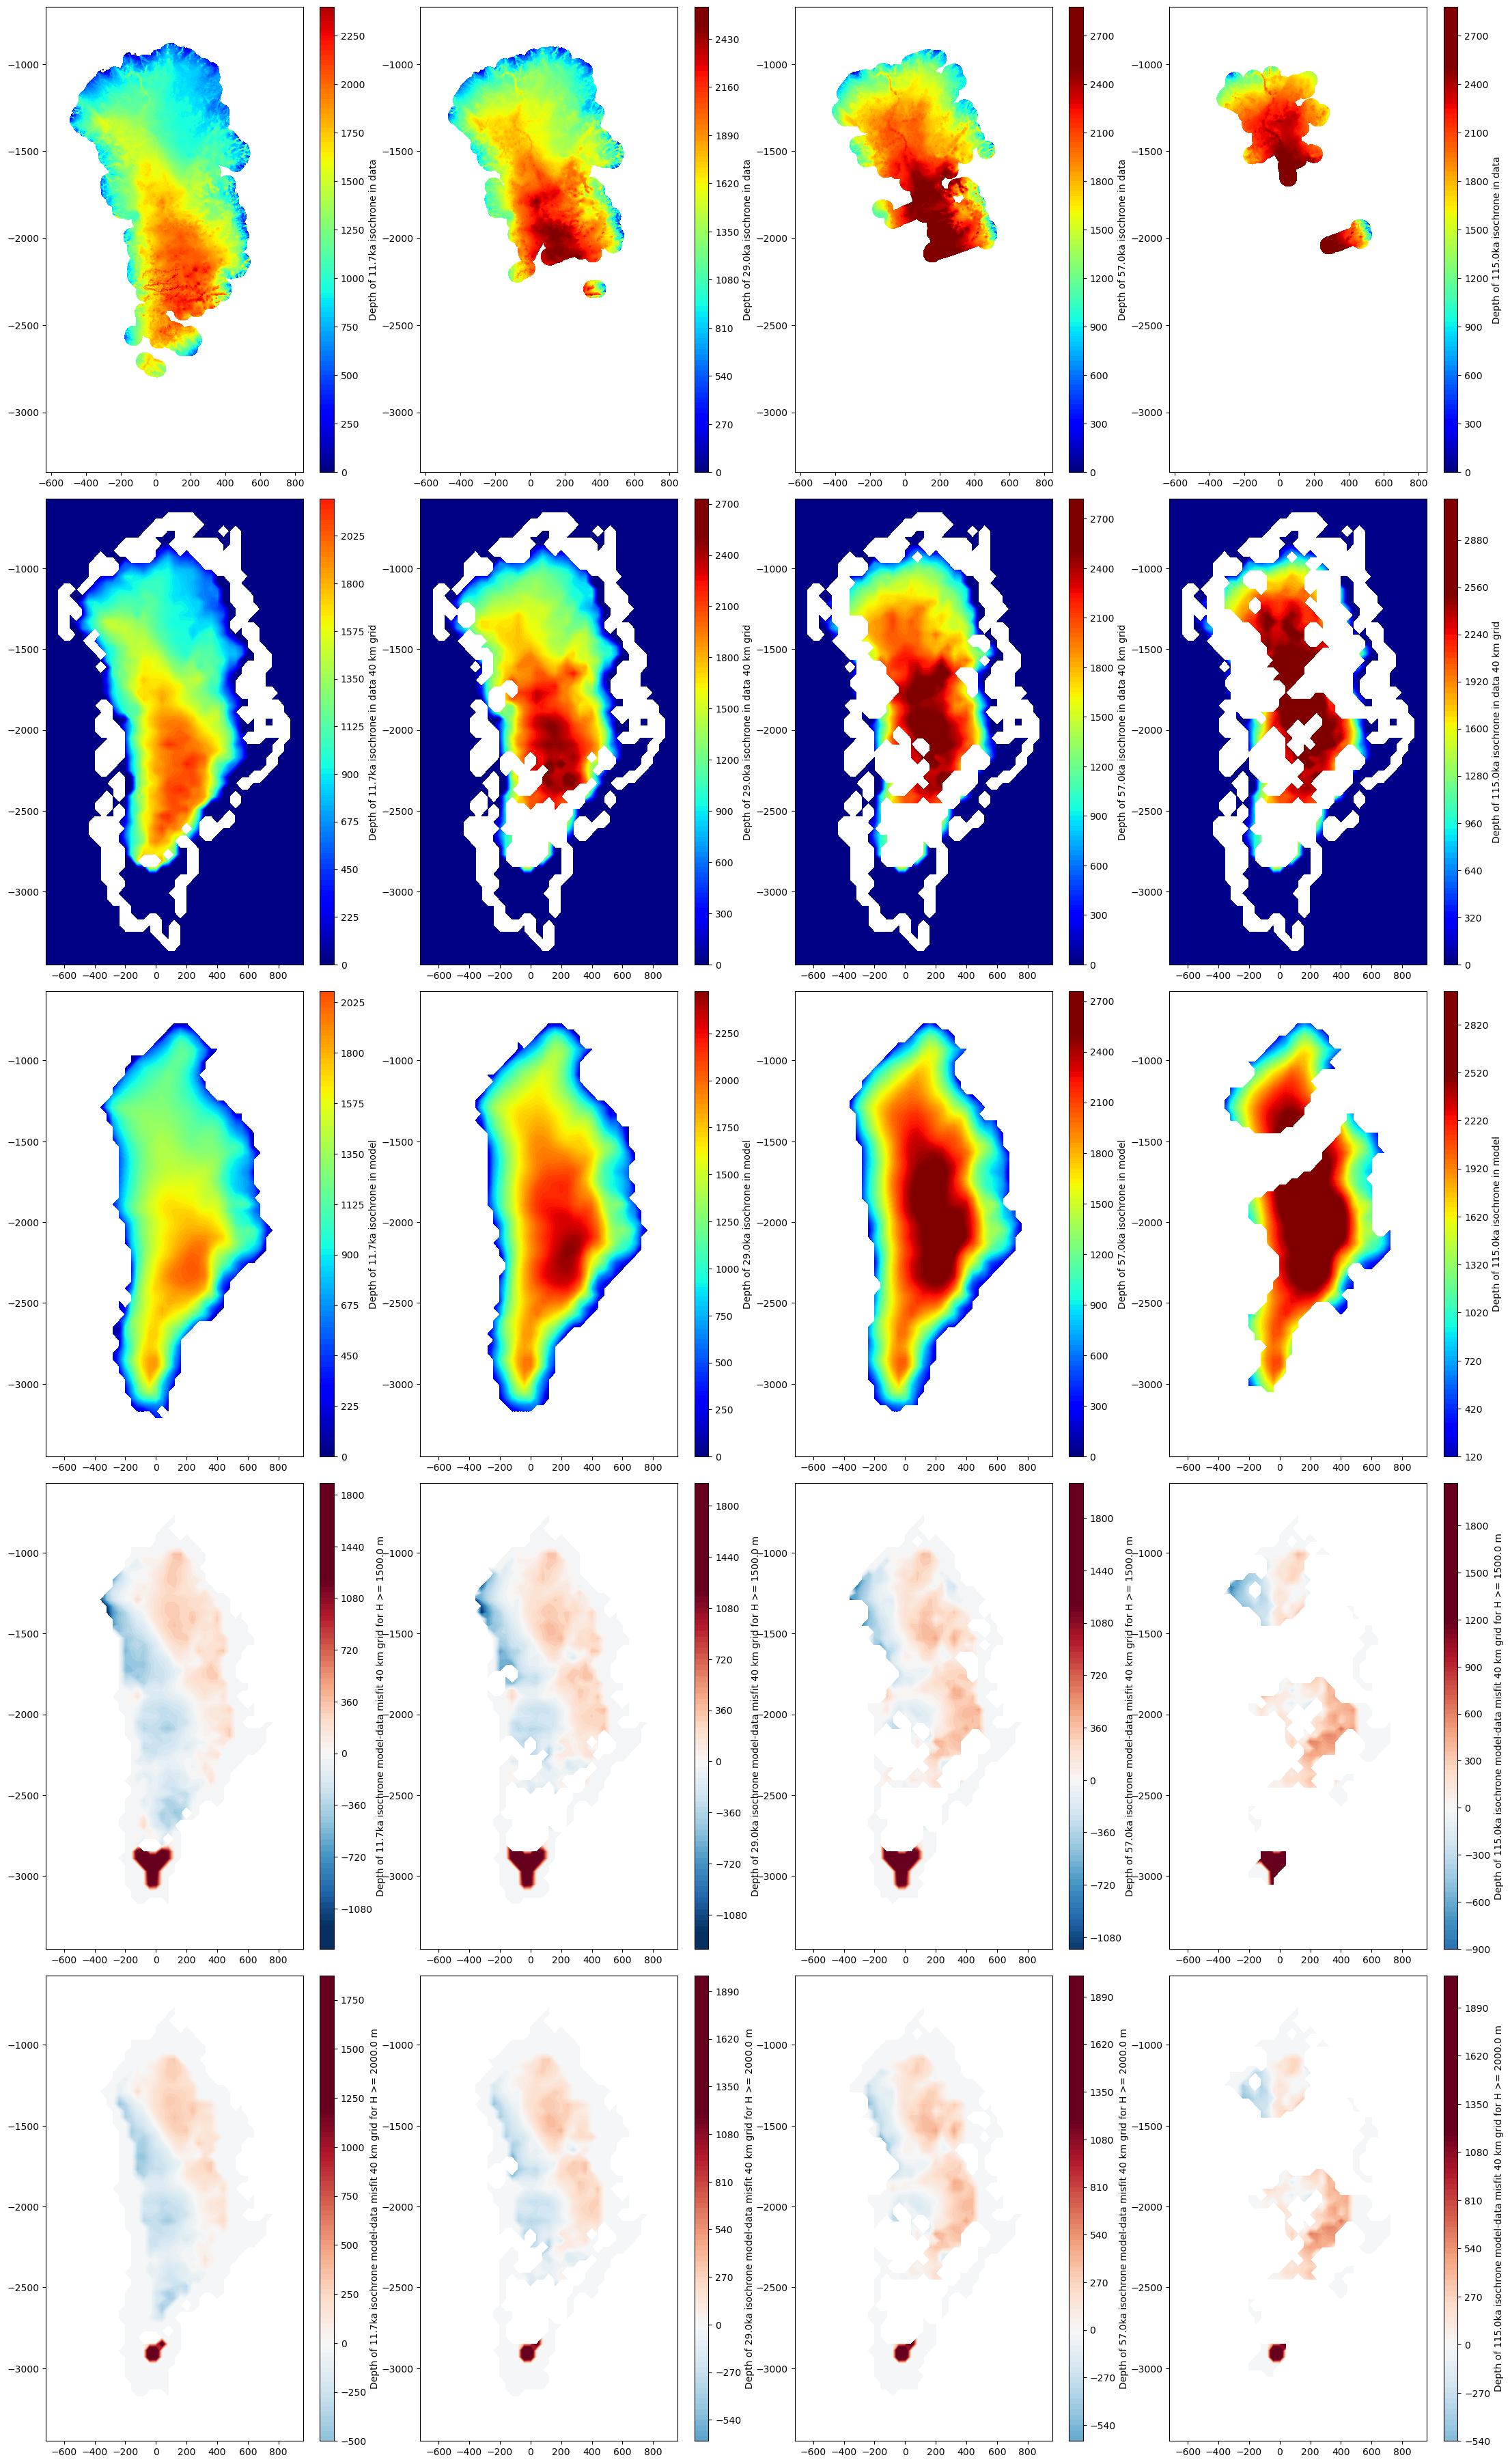

In [13]:
sigma_level_c = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['sigma_level_c'].data
age_c = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c'].data
H = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H'].data
cell_area = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['cell_area'].data
zb = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zb'].data

age_iso_11700_data = ds_age['depth_iso'][0]
age_iso_29000_data = ds_age['depth_iso'][1]
age_iso_57000_data = ds_age['depth_iso'][2]
age_iso_115000_data = ds_age['depth_iso'][3]

age_iso_1000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 1000.0)
age_iso_2000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 2000.0)
age_iso_3000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 3000.0)
age_iso_4000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 4000.0)
age_iso_5000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 5000.0)
age_iso_6000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 6000.0)
age_iso_7000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 7000.0)
age_iso_8000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 8000.0)
age_iso_9000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 9000.0)
age_iso_10000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                                ds_age_40km['H'].data, 
                                                                                ds_age_40km['age_c'].data, 
                                                                                age_iso_value = 10000.0)
age_iso_11000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                                ds_age_40km['H'].data, 
                                                                                ds_age_40km['age_c'].data, 
                                                                                age_iso_value = 11000.0)
age_iso_11700_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                                ds_age_40km['H'].data, 
                                                                                ds_age_40km['age_c'].data, 
                                                                                age_iso_value = 11700.0)
age_iso_21000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                                ds_age_40km['H'].data, 
                                                                                ds_age_40km['age_c'].data, 
                                                                                age_iso_value = 21000.0)
age_iso_29000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                                ds_age_40km['H'].data, 
                                                                                ds_age_40km['age_c'].data, 
                                                                                age_iso_value = 29000.0)
age_iso_57000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                                ds_age_40km['H'].data, 
                                                                                ds_age_40km['age_c'].data, 
                                                                                age_iso_value = 57000.0)
age_iso_60000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                                ds_age_40km['H'].data, 
                                                                                ds_age_40km['age_c'].data, 
                                                                                age_iso_value = 60000.0)
age_iso_115000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma'].data, 
                                                                                 ds_age_40km['H'].data, 
                                                                                 ds_age_40km['age_c'].data, 
                                                                                 age_iso_value = 115000.0)

age_iso_1000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 1000.0)
age_iso_2000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 2000.0)
age_iso_3000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 3000.0)
age_iso_4000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 4000.0)
age_iso_5000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 5000.0)
age_iso_6000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 6000.0)
age_iso_7000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 7000.0)
age_iso_8000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 8000.0)
age_iso_9000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 9000.0)
age_iso_10000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 10000.0)
age_iso_11000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 11000.0)
age_iso_11700 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 11700.0)
age_iso_21000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 21000.0)
age_iso_29000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 29000.0)
age_iso_30000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 30000.0)
age_iso_57000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 57000.0)
age_iso_60000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 60000.0)
age_iso_115000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 115000.0)
age_iso_134000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 134000.0)

n_rows, n_cols = 5, 4
aspect_ratio = ds_age['x'].shape[0]/ds_age['x'].shape[1]
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         age_iso_11700_data,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[0,0],
                         cbar_label = 'Depth of 11.7ka isochrone in data')
fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         age_iso_29000_data,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[0,1],
                         cbar_label = 'Depth of 29.0ka isochrone in data')
fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         age_iso_57000_data,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[0,2],
                         cbar_label = 'Depth of 57.0ka isochrone in data')
fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         age_iso_115000_data,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[0,3],
                         cbar_label = 'Depth of 115.0ka isochrone in data')

fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         age_iso_11700_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[1,0],
                         cbar_label = 'Depth of 11.7ka isochrone in data 40 km grid')
fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         age_iso_29000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[1,1],
                         cbar_label = 'Depth of 29.0ka isochrone in data 40 km grid')
fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         age_iso_57000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[1,2],
                         cbar_label = 'Depth of 57.0ka isochrone in data 40 km grid')
fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         age_iso_115000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[1,3],
                         cbar_label = 'Depth of 115.0ka isochrone in data 40 km grid')


fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         age_iso_11700,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100, 
                         fig = fig, ax = ax[2,0],
                         cbar_label= "Depth of 11.7ka isochrone in model")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         age_iso_29000,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100, 
                         fig = fig, ax = ax[2,1],
                         cbar_label= "Depth of 29.0ka isochrone in model")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         age_iso_57000,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100, 
                         fig = fig, ax = ax[2,2],
                         cbar_label= "Depth of 57.0ka isochrone in model")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         age_iso_115000,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100, 
                         fig = fig, ax = ax[2,3],
                         cbar_label= "Depth of 115.0ka isochrone in model")

fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_11700-age_iso_11700_data_40km)*(ds_age_40km['H'].data >= 1500.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[3,0],
                         cbar_label= "Depth of 11.7ka isochrone model-data misfit 40 km grid for H >= 1500.0 m")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_29000-age_iso_29000_data_40km)*(ds_age_40km['H'].data >= 1500.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[3,1],
                         cbar_label= "Depth of 29.0ka isochrone model-data misfit 40 km grid for H >= 1500.0 m")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_57000-age_iso_57000_data_40km)*(ds_age_40km['H'].data >= 1500.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[3,2],
                         cbar_label= "Depth of 57.0ka isochrone model-data misfit 40 km grid for H >= 1500.0 m")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_115000-age_iso_115000_data_40km)*(ds_age_40km['H'].data >= 1500.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[3,3],
                         cbar_label= "Depth of 115.0ka isochrone model-data misfit 40 km grid for H >= 1500.0 m")

fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_11700-age_iso_11700_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[4,0],
                         cbar_label= "Depth of 11.7ka isochrone model-data misfit 40 km grid for H >= 2000.0 m")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_29000-age_iso_29000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[4,1],
                         cbar_label= "Depth of 29.0ka isochrone model-data misfit 40 km grid for H >= 2000.0 m")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_57000-age_iso_57000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[4,2],
                         cbar_label= "Depth of 57.0ka isochrone model-data misfit 40 km grid for H >= 2000.0 m")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_115000-age_iso_115000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[4,3],
                         cbar_label= "Depth of 115.0ka isochrone model-data misfit 40 km grid for H >= 2000.0 m")
    
plt.tight_layout()

In [11]:
print(f"Total ice from Holocene as percentage of total volume: {np.nansum(cell_area*age_iso_11700)/np.nansum(cell_area*H)*100:2.2f}%")

Total ice from Holocene as percentage of total volume: 63.82%


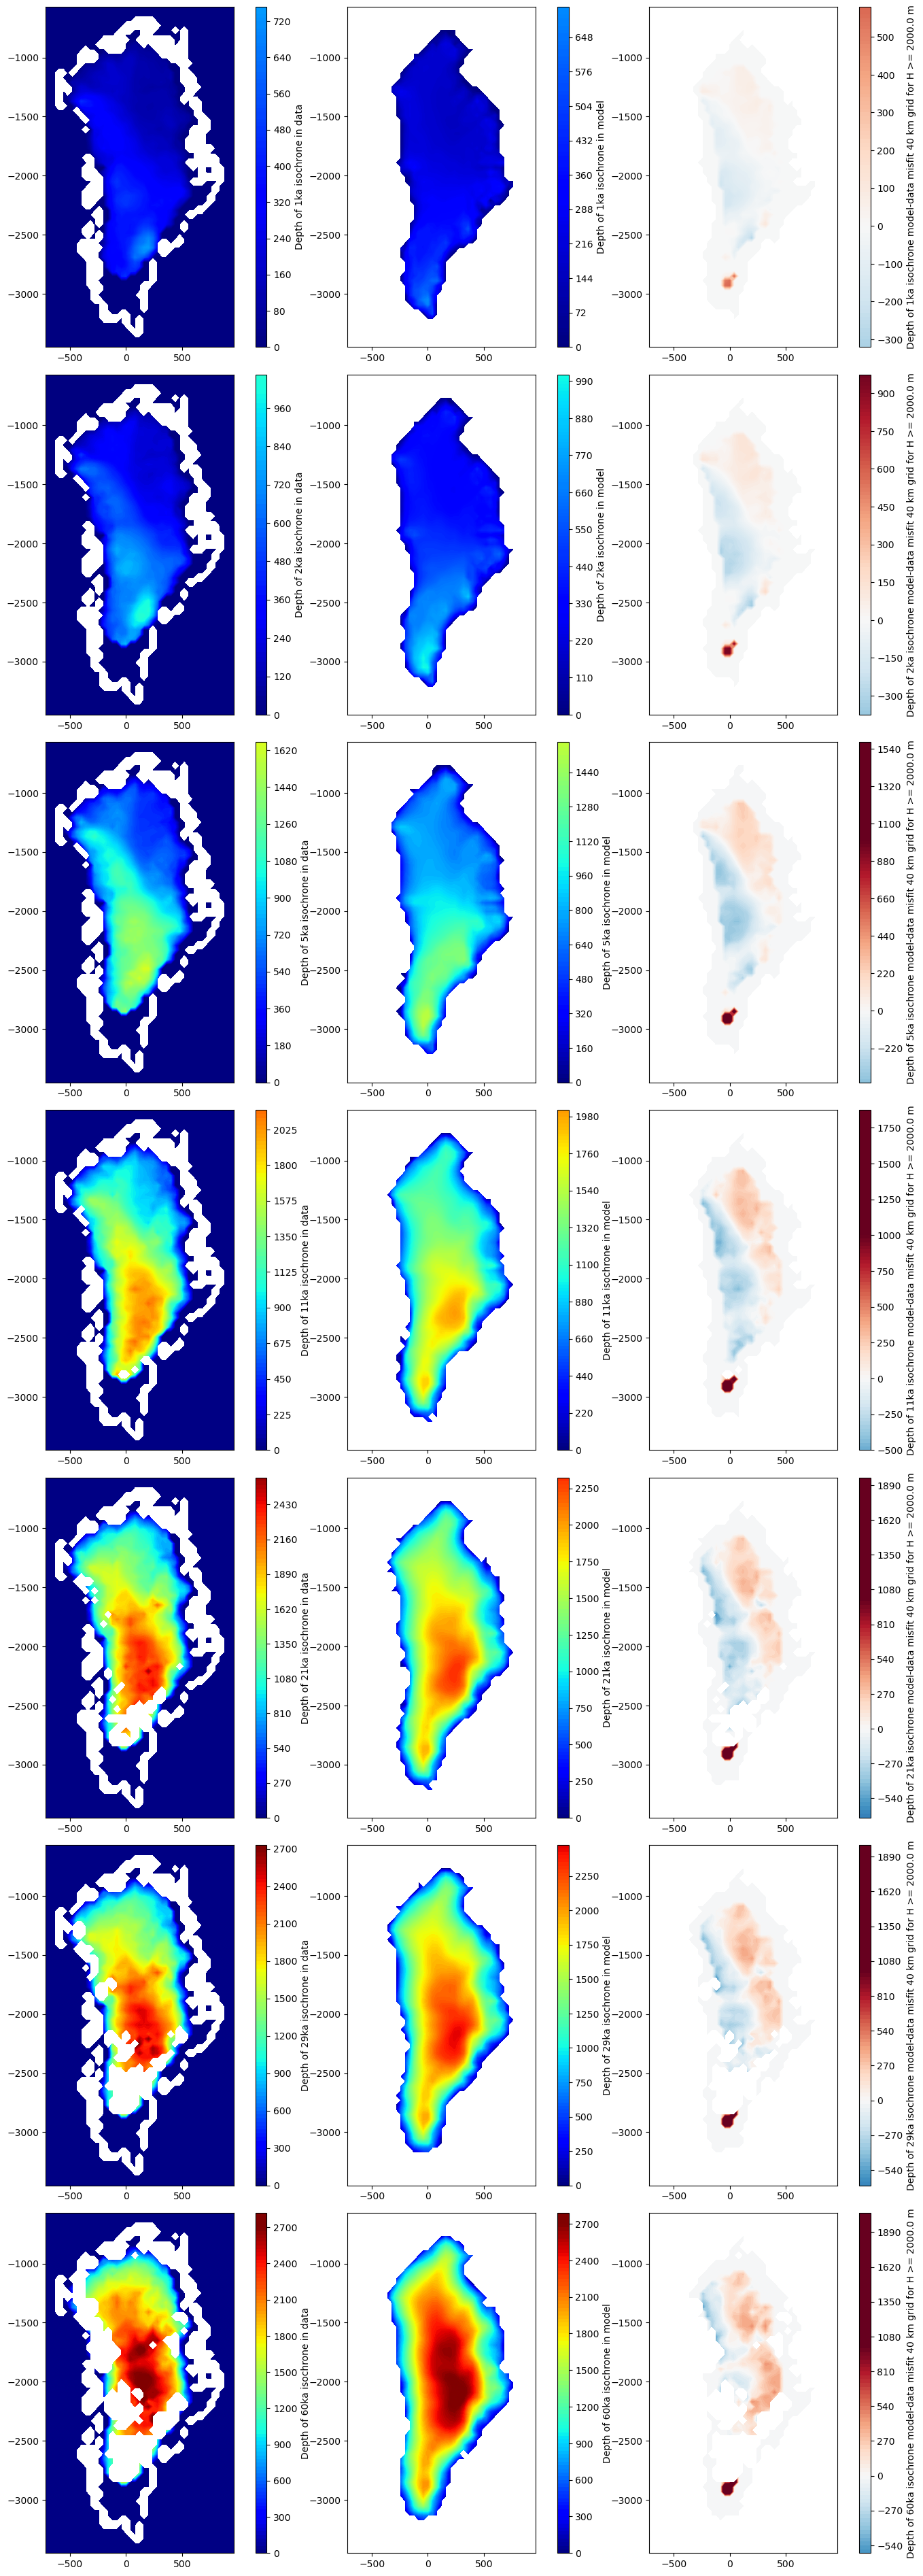

In [17]:
n_rows, n_cols = 7, 3
aspect_ratio = ds_age['x'].shape[0]/ds_age['x'].shape[1]
subplot_width = 3
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         age_iso_1000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[0,0],
                         cbar_label = 'Depth of 1ka isochrone in data')
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0,
                         age_iso_1000,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[0,1],
                         cbar_label = 'Depth of 1ka isochrone in model')
fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         (age_iso_1000-age_iso_1000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100,
                         fig = fig, ax = ax[0,2],
                         cbar_label = 'Depth of 1ka isochrone model-data misfit 40 km grid for H >= 2000.0 m')

fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         age_iso_2000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[1,0],
                         cbar_label = 'Depth of 2ka isochrone in data')
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0,
                         age_iso_2000,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[1,1],
                         cbar_label = 'Depth of 2ka isochrone in model')
fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         (age_iso_2000-age_iso_2000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100,
                         fig = fig, ax = ax[1,2],
                         cbar_label = 'Depth of 2ka isochrone model-data misfit 40 km grid for H >= 2000.0 m')

fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         age_iso_5000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[2,0],
                         cbar_label = 'Depth of 5ka isochrone in data')
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0,
                         age_iso_5000,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[2,1],
                         cbar_label = 'Depth of 5ka isochrone in model')
fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         (age_iso_5000-age_iso_5000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100,
                         fig = fig, ax = ax[2,2],
                         cbar_label = 'Depth of 5ka isochrone model-data misfit 40 km grid for H >= 2000.0 m')

fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         age_iso_11000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[3,0],
                         cbar_label = 'Depth of 11ka isochrone in data')
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0,
                         age_iso_11000,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[3,1],
                         cbar_label = 'Depth of 11ka isochrone in model')
fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         (age_iso_11000-age_iso_11000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100,
                         fig = fig, ax = ax[3,2],
                         cbar_label = 'Depth of 11ka isochrone model-data misfit 40 km grid for H >= 2000.0 m')

fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         age_iso_21000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[4,0],
                         cbar_label = 'Depth of 21ka isochrone in data')
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0,
                         age_iso_21000,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[4,1],
                         cbar_label = 'Depth of 21ka isochrone in model')
fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         (age_iso_21000-age_iso_21000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100,
                         fig = fig, ax = ax[4,2],
                         cbar_label = 'Depth of 21ka isochrone model-data misfit 40 km grid for H >= 2000.0 m')

fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         age_iso_29000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[5,0],
                         cbar_label = 'Depth of 29ka isochrone in data')
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0,
                         age_iso_29000,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[5,1],
                         cbar_label = 'Depth of 29ka isochrone in model')
fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         (age_iso_29000-age_iso_29000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100,
                         fig = fig, ax = ax[5,2],
                         cbar_label = 'Depth of 29ka isochrone model-data misfit 40 km grid for H >= 2000.0 m')

fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         age_iso_60000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[6,0],
                         cbar_label = 'Depth of 60ka isochrone in data')
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0,
                         age_iso_60000,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[6,1],
                         cbar_label = 'Depth of 60ka isochrone in model')
fancyPlotter.plot_normal(ds_age_40km['x'], ds_age_40km['y'], 
                         (age_iso_60000-age_iso_60000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100,
                         fig = fig, ax = ax[6,2],
                         cbar_label = 'Depth of 60ka isochrone model-data misfit 40 km grid for H >= 2000.0 m')

plt.tight_layout()